In [1]:
%pylab inline
rcParams["figure.figsize"] = (16,5)
from scipy.io import wavfile
import pyworld
import pysptk
import IPython
from IPython.display import Audio
import librosa
import librosa.display
from glob import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy

class   BinaryIOCollection(object):

    def load_binary_file(self, file_name, dimension):
        fid_lab = open(file_name, 'rb')
        features = numpy.fromfile(fid_lab, dtype=numpy.float32)
        fid_lab.close()
        assert features.size % float(dimension) == 0.0,'specified dimension %s not compatible with data'%(dimension)
        features = features[:(dimension * (features.size // dimension))]
        features = features.reshape((-1, dimension))

        return  features

    def array_to_binary_file(self, data, output_file_name):
        data = numpy.array(data, 'float32')

        fid = open(output_file_name, 'wb')
        data.tofile(fid)
        fid.close()

    def load_binary_file_frame(self, file_name, dimension):
        fid_lab = open(file_name, 'rb')
        features = numpy.fromfile(fid_lab, dtype=numpy.float32)
        fid_lab.close()
        assert features.size % float(dimension) == 0.0,'specified dimension %s not compatible with data'%(dimension)
        frame_number = features.size // dimension
        features = features[:(dimension * frame_number)]
        features = features.reshape((-1, dimension))

        return  features, frame_number


In [3]:
def read_binfile(filename, dim=60, dtype=np.float64):
    '''
    Reads binary file into numpy array.
    '''
 #   pdb.set_trace()
    fid = open(filename, 'rb')
    v_data = np.fromfile(fid, dtype=dtype)
    fid.close()
    if np.mod(v_data.size, dim) != 0:
        raise ValueError('Dimension provided not compatible with file size.')
    m_data = v_data.reshape((-1, dim)).astype('float64') # This is to keep compatibility with numpy default dtype.
    m_data = np.squeeze(m_data)
    return  m_data


In [4]:
wav_path = "/home/patrick/projects/merlin/egs/namestory/s5/experiments/namestory/acoustic_model/gen/feed_forward_6_tanh/s104_8.wav"

In [5]:
sr,x = wavfile.read(wav_path)

In [6]:
Audio(x, rate=sr)

In [39]:
gen_dir="/home/patrick/projects/merlin/egs/namestory/s5/experiments/namestory/acoustic_model/gen/feed_forward_6_tanh"

In [38]:
ref_dir="/home/patrick/projects/merlin/egs/namestory/s5/experiments/namestory/acoustic_model/inter_module/ref_data"

In [31]:
def synthesis(lf0_file, mgc_file_name,bap_file_name):
    lf0 = read_binfile(lf0_file,dim=1,dtype=np.float32)
    zeros_index = np.where(lf0 == -1E+10)
    nonzeros_index = np.where(lf0 != -1E+10)
    f0=lf0.copy()
    f0[zeros_index] = 0
    f0[nonzeros_index] = np.exp(lf0[nonzeros_index])
    f0 = f0.astype(np.float64)
    bap = read_binfile(bap_file_name,dim=1,dtype=np.float32)
    ap = pyworld.decode_aperiodicity(bap.astype(np.float64).reshape(-1,1), 16000, 1024)
    mc = read_binfile(mgc_file_name,dim=60,dtype=np.float32)
    alpha = pysptk.util.mcepalpha(16000)
    sp = pysptk.mc2sp(mc.astype(np.float64), fftlen=1024, alpha=alpha)
    wav = pyworld.synthesize(f0,sp,ap, 16000,5)
    return wav
    

In [101]:
utt_index="s104_9"

In [102]:
lf0_file = gen_dir+'/'+utt_index+'.lf0'
mgc_file_name=gen_dir+'/'+utt_index+'.mgc'
bap_file_name=gen_dir+'/'+utt_index+'.bap'

In [103]:
ref_lf0_file = ref_dir+'/'+utt_index+'.lf0'
ref_mgc_file_name=ref_dir+'/'+utt_index+'.mgc'
ref_bap_file_name=ref_dir+'/'+utt_index+'.bap'

In [104]:
wav=synthesis(lf0_file, ref_mgc_file_name,bap_file_name)

In [105]:
Audio(wav.astype(np.float32),rate=sr)

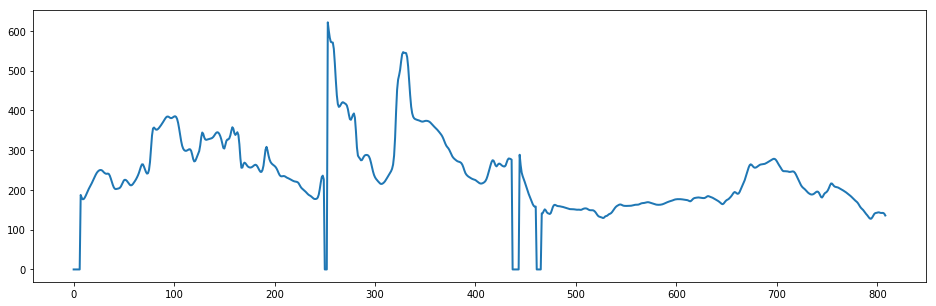

In [28]:
plot(f0,linewidth=2)

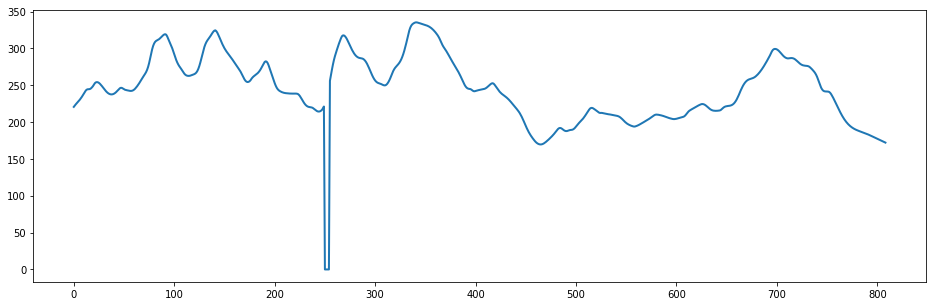

In [31]:
plot(f0,linewidth=2)